# 第2回資料/応用編

In [3]:
import pandas as pd
import numpy as np
import scipy as sp
from numpy import random as rd
import matplotlib.pyplot as plt
import scipy.stats as st

In [4]:
d01 = rd.normal(0.0, 1.0, 10000)        # 平均値:0.0 標準偏差:1.0 の正規分布（標準正規分布）に従う乱数を10,000個作成する。
d02 = rd.normal(0.0, 5.0, 10000)        # 平均値:0.0 標準偏差:5.0 の正規分布に従う乱数を10,000個作成する。
d03 = rd.normal(5.0, 1.0, 10000)        # 平均値:5.0 標準偏差:1.0 の正規分布に従う乱数を10,000個作成する。
d04 = rd.rand(10000)                    # 範囲[0, 1.0)の一様分布乱数を10,000個作成する。
d05 = 5.0 * rd.rand(10000) + 3.0       # 範囲[3.0, 8.0)の一様分布乱数を10,000個作成する。
d06 = rd.lognormal(0.05, 0.30, 10000)   # 平均値:0.05 標準偏差:0.30 の対数正規分布に従う乱数を10,000個作成する。
d07 = -rd.lognormal(0.05, 0.30, 10000)  # 平均値: -0.05 標準偏差:0.30 の対数正規分布に従う乱数を10,000個作成する。
d08 = np.hstack((rd.normal(-10.0, 3.0, 5000),rd.normal(7.0, 5.0, 5000)))  
# 平均値: -10.0 標準偏差: 3.0の正規分布に従う乱数5,000個と平均値: 7.0 標準偏差:5.0 の正規分布に従う乱数5,000個を合成したもの。
d09 = np.random.standard_cauchy(10000)  # コーシー分布に従う乱数を10,000個作成する。
d09 = d09[(d09>-25) & (d09<25)]        # コーシー分布は範囲が広いため、(-25, 25)の範囲のデータのみ抽出する。

## 要約統計量を出力する関数
- 入力
    - ary: データ配列
    - str: カラムの名前
- 出力
    - pandas.DataFrame: 要約統計量のデータフレーム

In [5]:
def stats_describe(ary, str):
    
    return pd.DataFrame(
        [np.mean(ary),np.median(ary), np.std(ary), st.skew(ary), st.kurtosis(ary)],
        index=["mean", "median", "std", "skew", "kurtosis"], 
        columns=[str])

## 要約統計量をつなげて出力

In [9]:
result = pd.concat([
    stats_describe(d01, "データ1"),
    stats_describe(d02, "データ2"),
    stats_describe(d03, "データ3"),
    stats_describe(d04, "データ4"),
    stats_describe(d05, "データ5"),
    stats_describe(d06, "データ6"),
    stats_describe(d07, "データ7"),
    stats_describe(d08, "データ8"),
    stats_describe(d09, "データ9")
], axis=1)

### Jupyter Notebook上で出力

In [10]:
result

,データ1,データ2,データ3,データ4,データ5,データ6,データ7,データ8,データ9
mean,-0.021469,0.084489,5.004451,0.499477,5.506649,1.100560,-1.098543,-1.460298,-0.027195
median,-0.027096,0.095378,5.009127,0.498284,5.512750,1.054240,-1.051153,-3.798550,0.004333
std,1.004425,4.988594,1.001052,0.288114,1.444519,0.337021,0.341609,9.518702,3.991363
skew,-0.008608,-0.018302,-0.009998,0.008025,-0.007808,0.940486,-0.924398,0.241046,-0.215270
kurtosis,0.012315,-0.063282,0.048003,-1.197415,-1.206629,1.538792,1.560600,-1.305365,10.906351


### 同じフォルダのExcelファイルとして出力

In [11]:
result.to_excel('要約統計量.xlsx')

## matplotlibでのヒストグラム作成例

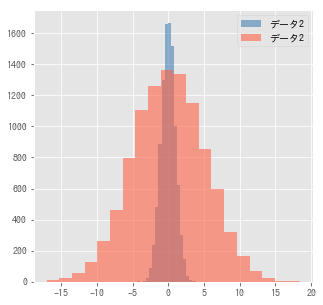

In [20]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)

ax.hist(d01, bins=20, color="steelblue", alpha=0.6, label="データ2")
ax.hist(d02, bins=20, color="tomato", alpha=0.6, label="データ2")

plt.legend()
plt.show()

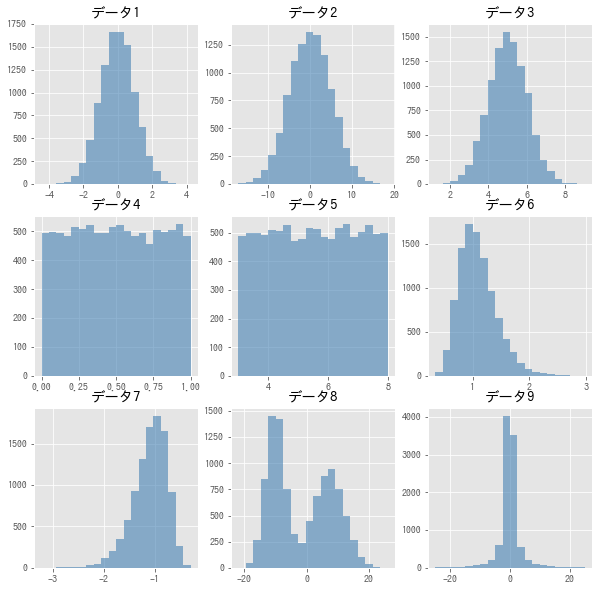

In [26]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(3,3,1)
ax.hist(d01, bins=20, color="steelblue", alpha=0.6)
ax.set_title("データ1")

ax = fig.add_subplot(3,3,2)
ax.hist(d02, bins=20, color="steelblue", alpha=0.6)
ax.set_title("データ2")

ax = fig.add_subplot(3,3,3)
ax.hist(d03, bins=20, color="steelblue", alpha=0.6)
ax.set_title("データ3")

ax = fig.add_subplot(3,3,4)
ax.hist(d04, bins=20, color="steelblue", alpha=0.6)
ax.set_title("データ4")

ax = fig.add_subplot(3,3,5)
ax.hist(d05, bins=20, color="steelblue", alpha=0.6)
ax.set_title("データ5")

ax = fig.add_subplot(3,3,6)
ax.hist(d06, bins=20, color="steelblue", alpha=0.6)
ax.set_title("データ6")

ax = fig.add_subplot(3,3,7)
ax.hist(d07, bins=20, color="steelblue", alpha=0.6)
ax.set_title("データ7")

ax = fig.add_subplot(3,3,8)
ax.hist(d08, bins=20, color="steelblue", alpha=0.6)
ax.set_title("データ8")

ax = fig.add_subplot(3,3,9)
ax.hist(d09, bins=20, color="steelblue", alpha=0.6)
ax.set_title("データ9")

plt.show()
